In [1]:
#numpy, pandas, matplotlib, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#PyTorch and its sub modules
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch import nn

from jpeg_to_num import *

In [2]:
os.getcwd()

'/Users/yiboliang/math108c/-Math_108C-Final-Project'

In [3]:
Current_Directory=os.getcwd()
Image_Directory=os.path.join(Current_Directory, "data/", "data")
Image_Directory

'/Users/yiboliang/math108c/-Math_108C-Final-Project/data/data'

In [4]:
train_transform=transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()])
dataloader=DataLoader(dataset=torchvision.datasets.ImageFolder(os.path.join(Current_Directory, "data/"), transform=train_transform), batch_size=64)

In [5]:
all_features=[]
flag=1
for train_features, train_labels in dataloader:
    all_features.append(train_features)
    
    if flag==1:
        print(f"Feature batch shape: {train_features.shape}")
        flag=0

all_features=torch.cat(all_features, dim=0)
all_features.shape

Feature batch shape: torch.Size([64, 1, 218, 178])


torch.Size([5000, 1, 218, 178])

In [6]:
# turn tensor into matrix
mymat = np.asarray(all_features[0,:])

In [7]:
# function for cov matrix
def covariance(i):
    X = mymat[i]
    return (1/((X.shape[0]*X.shape[1])-1)) * np.transpose(X) @ X

Cov = covariance(0)

In [8]:
# aquire all eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(Cov)

In [9]:
# sort eigenvalues in descending order
index = np.argsort(eigenvalues)[::-1]

# sort eigenvalues
sorted_eigenvalues = eigenvalues[index]

# sort eigenvectors
sorted_eigenvectors = eigenvectors[:,index]

eigenvectors

array([[ 0.04598402,  0.0403565 , -0.11622447, ..., -0.02076791,
         0.04141479,  0.08969976],
       [ 0.05382681, -0.0230995 ,  0.09688287, ..., -0.02429436,
         0.04370163,  0.08895408],
       [-0.02472555,  0.0548454 ,  0.00493543, ..., -0.02649797,
         0.04345314,  0.08911831],
       ...,
       [-0.07990737,  0.03156812, -0.01776984, ..., -0.03539729,
         0.03151438,  0.08723041],
       [ 0.0224223 ,  0.01374722, -0.02780964, ..., -0.0426641 ,
         0.0349314 ,  0.08777967],
       [-0.08706868, -0.0285493 ,  0.05495342, ..., -0.04819672,
         0.03820106,  0.08810271]], dtype=float32)

In [10]:
# select eigenvecgtors corresponding to the top 10 eigenvalues
top_eigenvectors = sorted_eigenvectors[:, :10]

In [11]:
# biuld the projection matrix
projection_matrix = top_eigenvectors @ np.transpose(top_eigenvectors)

In [12]:
mymat
projected = mymat.dot(projection_matrix)
projected

array([[[0.89484483, 0.89138097, 0.89597744, ..., 0.8216993 ,
         0.83950365, 0.84738046],
        [0.90190756, 0.89904016, 0.9040832 , ..., 0.8341555 ,
         0.8513838 , 0.8571222 ],
        [0.9052334 , 0.9026081 , 0.908222  , ..., 0.8434417 ,
         0.8608325 , 0.86573356],
        ...,
        [0.361319  , 0.3529841 , 0.35681936, ..., 0.3613351 ,
         0.3792637 , 0.37337857],
        [0.401006  , 0.3954077 , 0.3999024 , ..., 0.37901217,
         0.40160155, 0.3959066 ],
        [0.428266  , 0.4235391 , 0.4275074 , ..., 0.38954443,
         0.41488767, 0.40886062]]], dtype=float32)

In [13]:
projected.shape
# this indicates that data needs to be reshaped

(1, 218, 178)

In [14]:
projected = projected.reshape(-1, 178)

In [15]:
principalDf = pd.DataFrame(data = projected) 
principalDf

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.894845,0.891381,0.895977,0.921408,0.939303,0.939943,0.941081,0.918297,0.907781,0.864195,...,0.542565,0.589581,0.681475,0.760325,0.840499,0.874843,0.828300,0.821699,0.839504,0.847380
1,0.901908,0.899040,0.904083,0.928367,0.945229,0.946572,0.945706,0.922280,0.910453,0.867040,...,0.553107,0.603932,0.698232,0.774551,0.852588,0.887733,0.841563,0.834155,0.851384,0.857122
2,0.905233,0.902608,0.908222,0.932277,0.948934,0.950163,0.948500,0.924609,0.912586,0.869533,...,0.560311,0.613221,0.708951,0.784403,0.861860,0.897210,0.850656,0.843442,0.860833,0.865734
3,0.904827,0.902037,0.907663,0.932355,0.949386,0.950604,0.948925,0.924726,0.913070,0.870142,...,0.558286,0.612063,0.708292,0.784608,0.863076,0.899327,0.852818,0.846230,0.864053,0.869041
4,0.910386,0.907658,0.912743,0.936699,0.952833,0.955100,0.951710,0.927236,0.914956,0.872694,...,0.560027,0.617369,0.714657,0.789342,0.866453,0.904883,0.860934,0.854519,0.871977,0.875110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.351671,0.343865,0.344629,0.347456,0.359713,0.354817,0.324301,0.301153,0.299411,0.295714,...,0.269912,0.283765,0.285817,0.289804,0.307366,0.326761,0.340221,0.345912,0.359393,0.352875
214,0.337909,0.329563,0.332659,0.335419,0.350456,0.341585,0.312984,0.289394,0.289576,0.284568,...,0.291808,0.299528,0.301428,0.306240,0.326543,0.338147,0.343255,0.350097,0.362901,0.356399
215,0.361319,0.352984,0.356819,0.360800,0.375447,0.363563,0.335171,0.309871,0.312171,0.306592,...,0.290049,0.301184,0.306667,0.315332,0.337371,0.349808,0.350836,0.361335,0.379264,0.373379
216,0.401006,0.395408,0.399902,0.402520,0.414076,0.401920,0.368543,0.338656,0.335536,0.323142,...,0.301809,0.316624,0.329314,0.342717,0.364091,0.378778,0.370941,0.379012,0.401602,0.395907


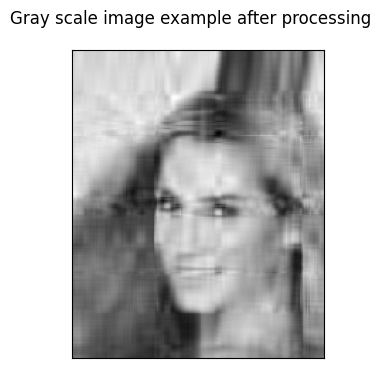

In [16]:
plt.figure(figsize=((6,4)))
plt.suptitle("Gray scale image of PCA with 10 features")
plt.xticks(())
plt.yticks(())
plt.imshow(projected.squeeze(), cmap="gray")